# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH,LABEL,TRANSFORMATION PROCESS

#### MAIN PATH

In [2]:
Surface_Data = Path("../input/surface-crack-detection")

#### JPG PATH

In [3]:
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))

#### JPG LABELS

In [4]:
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))

#### TO SERIES

In [5]:
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")

#### TO DATAFRAME

In [6]:
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)

In [7]:
print(Main_Surface_Data.head(-1))

                                                     JPG  CATEGORY
0      ../input/surface-crack-detection/Negative/0845...  Negative
1      ../input/surface-crack-detection/Negative/1981...  Negative
2      ../input/surface-crack-detection/Negative/1691...  Negative
3      ../input/surface-crack-detection/Negative/0593...  Negative
4      ../input/surface-crack-detection/Negative/0612...  Negative
...                                                  ...       ...
39994  ../input/surface-crack-detection/Positive/0011...  Positive
39995  ../input/surface-crack-detection/Positive/1231...  Positive
39996  ../input/surface-crack-detection/Positive/1864...  Positive
39997  ../input/surface-crack-detection/Positive/1270...  Positive
39998  ../input/surface-crack-detection/Positive/1281...  Positive

[39999 rows x 2 columns]


#### TO SHUFFLE

In [8]:
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)

In [9]:
print(Main_Surface_Data.head(-1))

                                                     JPG  CATEGORY
0      ../input/surface-crack-detection/Positive/0292...  Positive
1      ../input/surface-crack-detection/Negative/0642...  Negative
2      ../input/surface-crack-detection/Negative/1425...  Negative
3      ../input/surface-crack-detection/Positive/0297...  Positive
4      ../input/surface-crack-detection/Negative/0126...  Negative
...                                                  ...       ...
39994  ../input/surface-crack-detection/Positive/1715...  Positive
39995  ../input/surface-crack-detection/Negative/1122...  Negative
39996  ../input/surface-crack-detection/Positive/1229...  Positive
39997  ../input/surface-crack-detection/Negative/0967...  Negative
39998  ../input/surface-crack-detection/Positive/1722...  Positive

[39999 rows x 2 columns]


# VISUALIZATION

In [10]:
plt.style.use("dark_background")

#### LABESL

In [11]:
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Positive"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Negative"]

Positive_Surface = Positive_Surface.reset_index()
Negative_Surface = Negative_Surface.reset_index()

# SPLITTING TRAIN AND TEST

In [12]:
xTrain,xTest = train_test_split(Main_Surface_Data,train_size=0.9,shuffle=True,random_state=42)

In [13]:
print(xTrain.shape)
print(xTest.shape)

(36000, 2)
(4000, 2)


# IMAGE GENERATOR

#### STRUCTURE

In [14]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.5,
                                        zoom_range=0.5,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        brightness_range=[0.6,0.9],
                                        vertical_flip=True,
                                        validation_split=0.1)

In [15]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

#### APPLYING

In [16]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=xTrain,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                   subset="training",
                                                    batch_size=32,
                                                    seed=32)

Found 32400 validated image filenames belonging to 2 classes.


In [17]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=xTrain,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                   subset="validation",
                                                    batch_size=32,
                                                    seed=32)

Found 3600 validated image filenames belonging to 2 classes.


In [18]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=xTest,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="binary",
                                                   target_size=(200,200),
                                                    batch_size=32,
                                                    seed=32)

Found 4000 validated image filenames belonging to 2 classes.


#### CHECKING

In [19]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'Negative': 0, 'Positive': 1}
[1, 1, 0, 1, 1]
(200, 200, 3)
------------------------------------------------------------
VALIDATION: 
{'Negative': 0, 'Positive': 1}
[1, 1, 0, 1, 1]
(200, 200, 3)
------------------------------------------------------------
TEST: 
{'Negative': 0, 'Positive': 1}
[0, 1, 0, 0, 0]
(200, 200, 3)


# MODEL RNN-LSTM

#### PARAMETERS

In [20]:
print(Train_Set.image_shape[0],Train_Set.image_shape[1],Train_Set.image_shape[2])

200 200 3


In [21]:
compile_optimizer = "adam"
compile_loss = "binary_crossentropy"
input_dim = (Train_Set.image_shape[0],Train_Set.image_shape[1],Train_Set.image_shape[2])
class_dim = 1

#### CALLBACKS

In [22]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

#### STRUCTURE

In [23]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(1024,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(class_dim,activation="sigmoid"))

In [24]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])

In [25]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=50)

Epoch 1/50
1013/1013 [==============================] - 587s 575ms/step - loss: 0.4102 - accuracy: 0.9106 - val_loss: 0.1328 - val_accuracy: 0.9728
Epoch 2/50
1013/1013 [==============================] - 400s 394ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0563 - val_accuracy: 0.9861
Epoch 3/50
1013/1013 [==============================] - 395s 390ms/step - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.1912 - val_accuracy: 0.9133
Epoch 4/50
1013/1013 [==============================] - 394s 389ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.2380 - val_accuracy: 0.8894
Epoch 5/50
1013/1013 [==============================] - 398s 393ms/step - loss: 0.0444 - accuracy: 0.9874 - val_loss: 0.1851 - val_accuracy: 0.9247
Epoch 6/50
1013/1013 [==============================] - 395s 390ms/step - loss: 0.0453 - accuracy: 0.9870 - val_loss: 0.0459 - val_accuracy: 0.9839
Epoch 7/50
1013/1013 [==============================] - 393s 388ms/step - loss: 0.0373 - accuracy: 0.9888 - val_

#### CHECKING MODEL

In [26]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 128)       7

In [27]:
Model.save("Model_Last_Prediction.h5")

#### PREDICTION PROCESS

In [28]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

125/125 [==============================] - 37s 298ms/step - loss: 0.2376 - accuracy: 0.8988
LOSS:  0.2376
ACCURACY:  0.90


In [29]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

[0 0 0 ... 0 0 0]


In [30]:
Model_Test_Prediction_Classes = Model.predict_classes(Test_Set)
print(Model_Test_Prediction_Classes)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


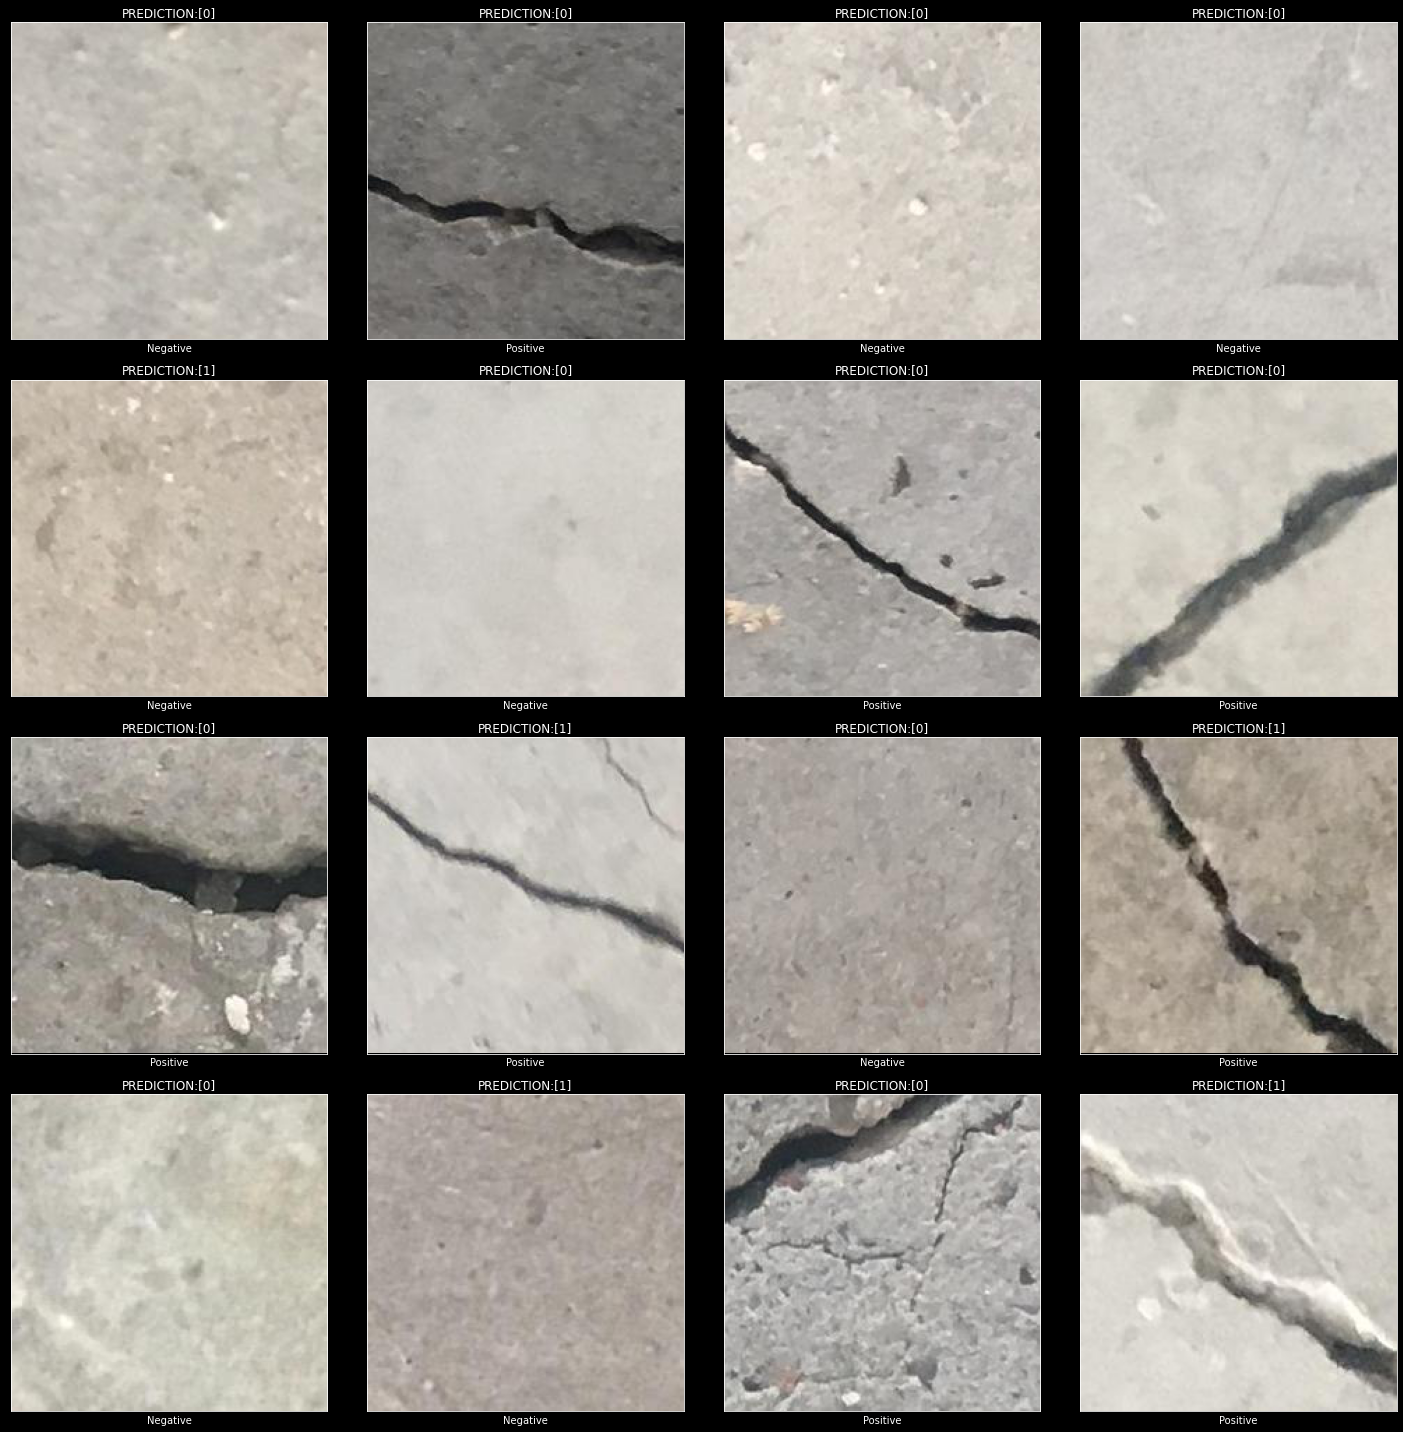

In [31]:
fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(xTest["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_Classes[i]}")
    ax.set_xlabel(xTest["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

In [32]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

# Load your trained model
model = load_model("Model_Last_Prediction.h5")

def predict_and_visualize(index, surface_df, model):
    """
    index      : int -> which image to pick from dataframe
    surface_df : DataFrame -> Positive_Surface or Negative_Surface
    model      : trained keras model
    """

    # 1. Get image path
    img_path = surface_df["JPG"].iloc[index]

    # 2. Read image
    Reading_Img = cv2.imread(img_path)
    Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)

    # 3. Preprocess for prediction (resize to 200x200x3)
    img_resized = cv2.resize(Reading_Img, (200,200)) / 255.0
    img_input = img_resized.reshape(1,200,200,3)

    # 4. Predict
    prediction = model.predict(img_input)[0][0]
    label = "Positive" if prediction > 0.5 else "Negative"

    # 5. Visualization
    fig, axis = plt.subplots(2,2, figsize=(12,12))

    # (a) Original
    axis[0,0].imshow(Reading_Img)
    axis[0,0].set_title(f"Original\nPrediction: {label} ({prediction:.2f})")

    # (b) Contours
    gray = cv2.cvtColor(Reading_Img, cv2.COLOR_RGB2GRAY)
    _, Threshold_Img = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img, 90, 100)
    contours, _ = cv2.findContours(Canny_Img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    Contour_Img = cv2.drawContours(Reading_Img.copy(), contours, -1, (255,0,0), 1)
    axis[0,1].imshow(Contour_Img)
    axis[0,1].set_title("Contours")

    # (c) Hessian Maxima
    Hessian_Matrix_Img = hessian_matrix(gray, sigma=0.15, order="rc")
    maxima_Img, minima_Img = hessian_matrix_eigvals(Hessian_Matrix_Img)
    axis[1,0].imshow(maxima_Img, cmap="Greys_r")
    axis[1,0].set_title("Hessian Maxima")

    # (d) Hessian Minima
    axis[1,1].imshow(minima_Img, cmap="Greys_r")
    axis[1,1].set_title("Hessian Minima")

    plt.tight_layout()
    plt.show()


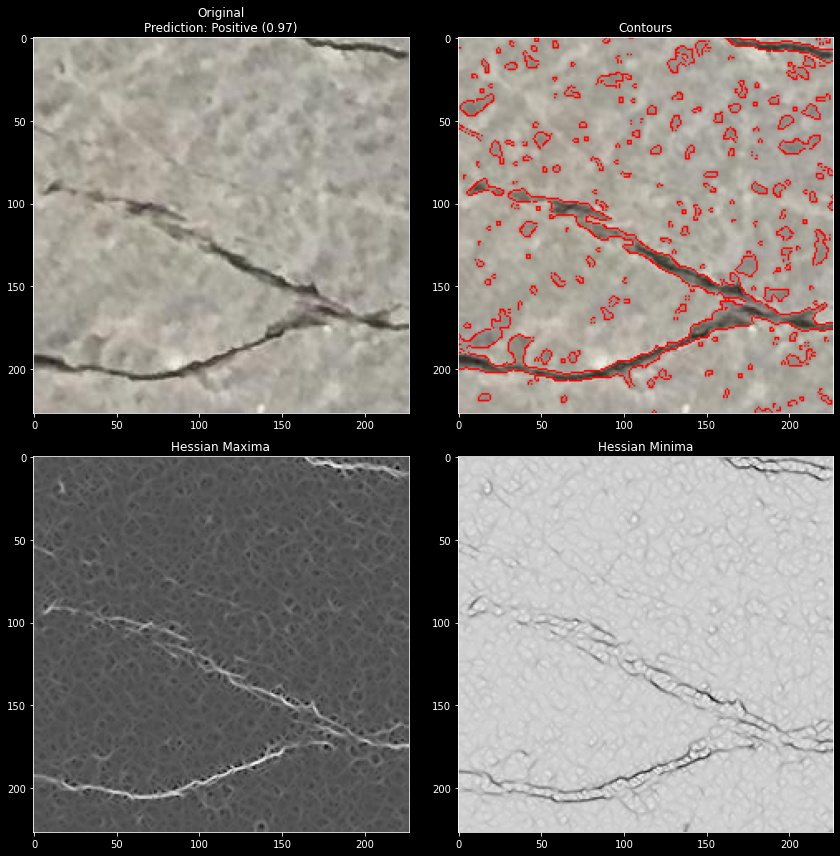

In [33]:
predict_and_visualize(2, Positive_Surface, model)